In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8) # Увеличить дефолтный размер
plt.rcParams["figure.dpi"] = 180 # Увеличим дефолтный dpi
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

## Знакомство с numpy

Из-за медленной скорости выполнения кода на python некоторые библиотеки пишутся на языках программирования с или с++, а затем создают обёрки над кодом для работы через python, которые сохраняют своё быстродействие. Таким образом была создана библиотека Numpy для быстрых математический вычислений. На базе numpy строятся более высокоуровневые библиотеки такие как уже известная нам библиотека pandas.
Numpy работает с матрицами. Элементы матрицы обязательно должны бить одинакого типа.


При помощи numpy мы решим следующую задачу на теорию вероятности

**Задача:**  
Петя и Вася играют в кости. У Пети кость с 4 гранями, а у Васи с 6 гранями. Петя кидает кубик 6 раз, а Вася 4 раза. Победитель определяется суммой очков на костях. Какова вероятность, что выиграет Петя?

In [7]:
import numpy as np

In [8]:
A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [9]:
A = np.array([[1, 2], [3, 4]], dtype=float)
A

array([[1., 2.],
       [3., 4.]])

Расчёт комбинаций для Пети

In [14]:
import itertools

peter_comb = np.array(list(itertools.product([1, 2, 3, 4], repeat=6)))
peter_comb

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 2],
       [1, 1, 1, 1, 1, 3],
       ...,
       [4, 4, 4, 4, 4, 2],
       [4, 4, 4, 4, 4, 3],
       [4, 4, 4, 4, 4, 4]])

In [15]:
peter_comb.shape

(4096, 6)

In [16]:
a = peter_comb[4090]
a

array([4, 4, 4, 4, 3, 3])

In [17]:
a > 3

array([ True,  True,  True,  True, False, False])

In [18]:
a[a > 3]

array([4, 4, 4, 4])

Обращение к матрицам

In [20]:
peter_comb[4]

array([1, 1, 1, 1, 2, 1])

In [19]:
peter_comb[4, 4]

2

Вывести только столбец

In [15]:
peter_comb[:, 5]

array([1, 2, 3, ..., 2, 3, 4])

Расчёт комбинаций для Васи

In [22]:
vasya_comb = np.array(list(itertools.product([1, 2, 3, 4, 5, 6], repeat=4)))
vasya_comb

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [6, 6, 6, 4],
       [6, 6, 6, 5],
       [6, 6, 6, 6]])

In [23]:
vasya_comb.shape

(1296, 4)

In [25]:
sum_peter_comb = peter_comb.sum(axis=1)
sum_peter_comb

array([ 6,  7,  8, ..., 22, 23, 24])

In [26]:
sum_vasya_comb = vasya_comb.sum(axis=1)
sum_vasya_comb

array([ 4,  5,  6, ..., 22, 23, 24])

Для решения нашей задачки с костями нам нужно придумать как посчитать в скольких случаях сумма очков у Пети будет больше очков у Васи.
Для этого рассмотрим как описать векторную функцию.
Для описания векторной функции важно, чтобы вектора были перпендикулярны друг другу. Это значит, что значения векторов должны быть на разных осях.


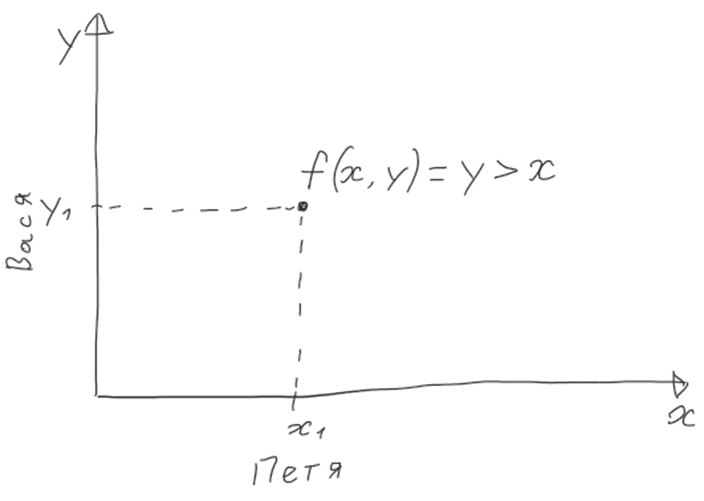

В нашем случае наши вектора должны иметь такие размеры

In [27]:
sum_peter_comb.reshape(1,-1).shape

(1, 4096)

In [21]:
sum_vasya_comb.reshape(-1,1).shape

(1296, 1)

In [22]:
sum_peter_comb.reshape(1,-1)

array([[ 6,  7,  8, ..., 22, 23, 24]])

In [23]:
sum_vasya_comb.reshape(-1,1)

array([[ 4],
       [ 5],
       [ 6],
       ...,
       [22],
       [23],
       [24]])

Расчёт выигрышной маски

In [27]:
win_mask = sum_peter_comb.reshape(1,-1) > sum_vasya_comb.reshape(-1, 1)
win_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False]])

In [28]:
win_mask.shape

(1296, 4096)

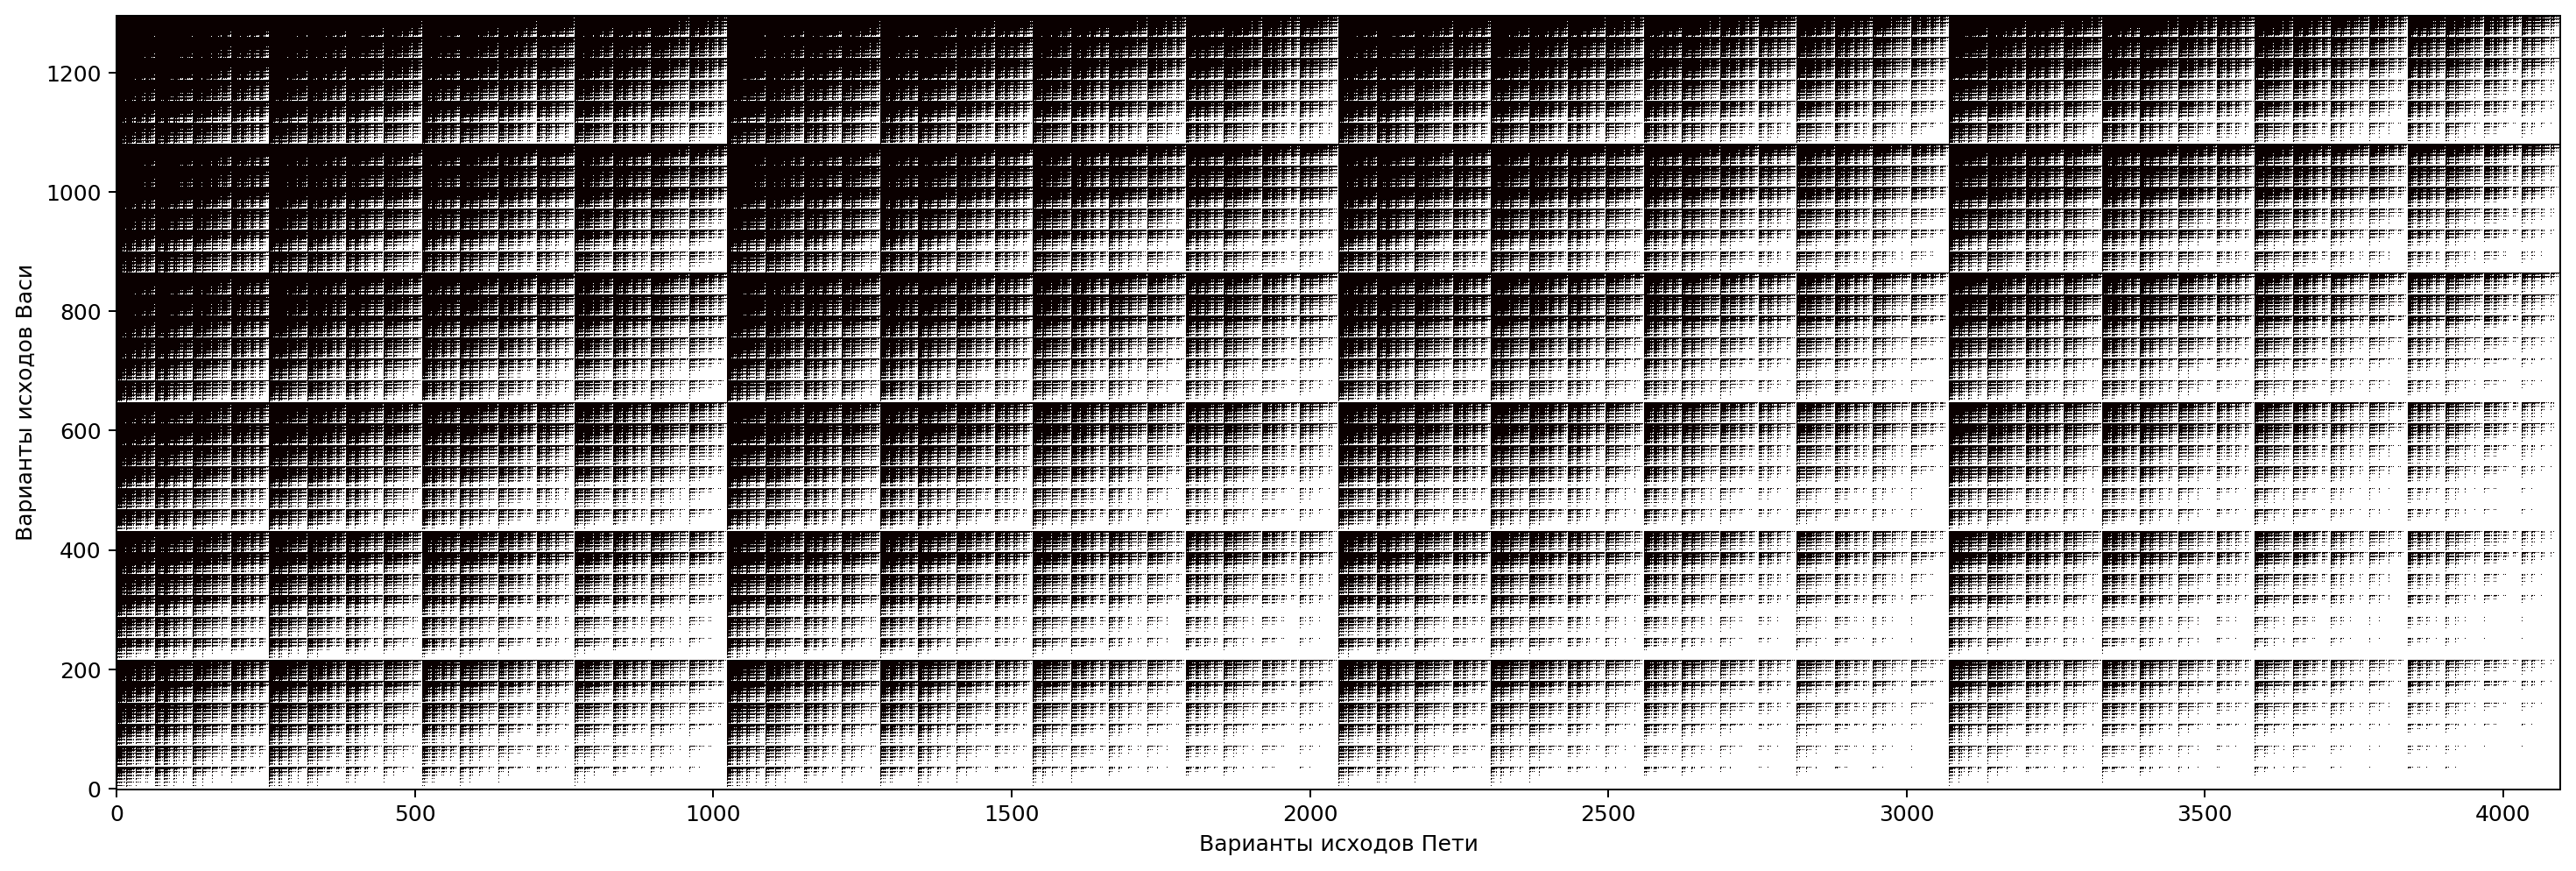

In [29]:
import matplotlib.pyplot as plt

plt.imshow(win_mask, cmap='hot', interpolation='nearest',origin ='lower')
plt.ylabel('Варианты исходов Васи')
plt.xlabel("Варианты исходов Пети")
plt.show()

In [84]:
win_mask.shape

(1296, 4096)

In [87]:
win_mask.shape[0] * win_mask.shape[1]

5308416

In [85]:
win_mask.sum()

2891376

Вероятность того, что выиграет Петя

In [88]:
win_mask.sum() / (win_mask.shape[0] * win_mask.shape[1])

0.544677734375